#Image Classification using CNN

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [49]:
classifier = Sequential()
classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 
classifier.add(Conv2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=2,activation='softmax'))
adam = Adam(lr=0.001)
classifier.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory(r'E:\Data\Cat-Dog-CNN-Classifier-master\dataset\training_set',
                                             target_size=(64,64),
                                             class_mode='sparse')

test_set1 = test_datagen.flow_from_directory(r'E:\Data\Cat-Dog-CNN-Classifier-master\dataset\test_set',
                                            target_size=(64,64),
                                            class_mode='sparse')
print(train_set.class_indices)
print(test_set1.class_indices)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [51]:
classifier.fit_generator(train_set, 
                        epochs = 30
                        )


Epoch 1/30
250/250 [==============================] - 87s 350ms/step - loss: 0.7238 - accuracy: 0.5491
Epoch 2/30
250/250 [==============================] - 95s 381ms/step - loss: 0.6440 - accuracy: 0.6345
Epoch 3/30
250/250 [==============================] - 94s 376ms/step - loss: 0.6179 - accuracy: 0.6639
Epoch 4/30
250/250 [==============================] - 92s 369ms/step - loss: 0.5636 - accuracy: 0.7116
Epoch 5/30
250/250 [==============================] - 94s 377ms/step - loss: 0.5011 - accuracy: 0.7496
Epoch 6/30
250/250 [==============================] - 114s 455ms/step - loss: 0.4275 - accuracy: 0.8049
Epoch 7/30
250/250 [==============================] - 103s 410ms/step - loss: 0.3530 - accuracy: 0.8425
Epoch 8/30
250/250 [==============================] - 99s 397ms/step - loss: 0.2573 - accuracy: 0.8926
Epoch 9/30
250/250 [==============================] - 87s 346ms/step - loss: 0.1986 - accuracy: 0.9233
Epoch 10/30
250/250 [==============================] - 87s 348ms/step -

In [54]:
classifier.save(r'E:\Data\Cat-Dog-CNN-Classifier-master\dataset\catdogmodel1.h5')

In [90]:
from tensorflow.keras.models import load_model
model = load_model(r'E:\Data\Cat-Dog-CNN-Classifier-master\dataset\catdogmodel1.h5')

In [91]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img("E:\Data\Cat-Dog-CNN-Classifier-master\dataset\single_prediction\cat_or_dog_1.jpg", 
                      target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction = classifier.predict_classes(img)

(1, 64, 64, 3)


In [92]:
prediction

array([1], dtype=int64)

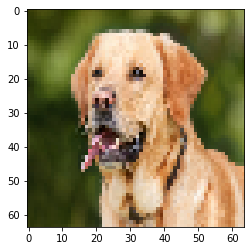

In [93]:
plt.imshow(img1)
plt.show()

In [94]:
img2 = image.load_img("E:\Data\Cat-Dog-CNN-Classifier-master\dataset\single_prediction\cat_or_dog_2.jpg", target_size=(64, 64))
img3 = image.img_to_array(img2)
img3 = img3/255
# create a batch of size 1 [N,H,W,C]
img3 = np.expand_dims(img3, axis=0)
prediction1 = classifier.predict_classes(img3)

In [95]:
prediction1

array([0], dtype=int64)

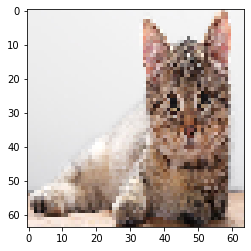

In [96]:
plt.imshow(img2)
plt.show()

In [97]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 7,411,906
Trainable params: 7,411,906
Non-trainable params: 0
____________________________________________

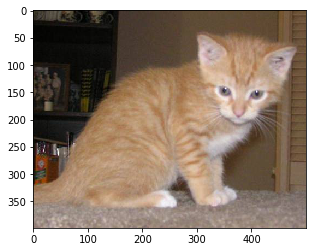

In [98]:

#Input Image for Layer visualization
img7 = image.load_img(r"E:\Data\Cat-Dog-CNN-Classifier-master\dataset\test_set\cats\cat.4003.jpg")
plt.imshow(img7);
#preprocess image
img8 = image.load_img(r"E:\Data\Cat-Dog-CNN-Classifier-master\dataset\test_set\cats\cat.4003.jpg", 
                      target_size=(64, 64))
img8 = image.img_to_array(img8)
img8 = img8/255
img8 = np.expand_dims(img8, axis=0)

In [99]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'conv2d_7', 'max_pooling2d_6', 'flatten_3', 'dense_6', 'dense_7']


In [102]:

from tensorflow.keras.models import Model
conv2d_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_6').output)
conv2d_1_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_7').output)

In [103]:
conv2d_6_features = conv2d_output.predict(img)
con2d_7_features = conv2d_1_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('second conv layer feature output shape : ',con2d_7_features.shape)

First conv layer feature output shape :  (1, 62, 62, 64)
second conv layer feature output shape :  (1, 60, 60, 64)


In [111]:
conv2d_6_features=conv2d_6_features.reshape(62,62,64)
con2d_7_features=con2d_7_features.reshape(60,60,64)

In [112]:
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('second conv layer feature output shape : ',con2d_7_features.shape)

First conv layer feature output shape :  (62, 62, 64)
second conv layer feature output shape :  (60, 60, 64)


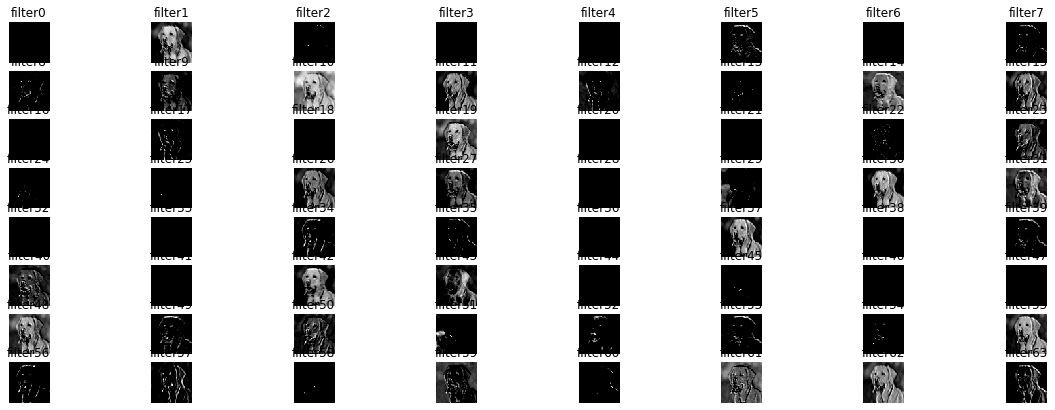

In [110]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(20,7))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[:, :, i], cmap='gray')
plt.show()

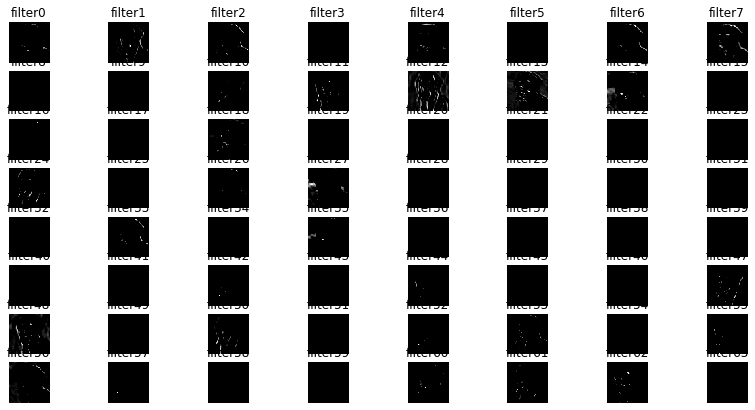

In [113]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(con2d_7_features[ :, :, i], cmap='gray')
plt.show()

In [114]:
#conv2d5_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_5').output)
maxpooling_6_output = Model(inputs=classifier.input,outputs=classifier.get_layer('max_pooling2d_6').output)
#conv2d_5_features = conv2d5_output.predict(img)
maxpooling_6_features = maxpooling_6_output.predict(img)
#print('First conv layer feature output shape : ',conv2d_5_features.shape)
print('First pooling layer feature output shape : ',maxpooling_6_features.shape)

First pooling layer feature output shape :  (1, 30, 30, 64)


In [115]:
#conv2d_5_features=conv2d_5_features.reshape(29,29,32)
maxpooling_6_features=maxpooling_6_features.reshape(30,30,64)

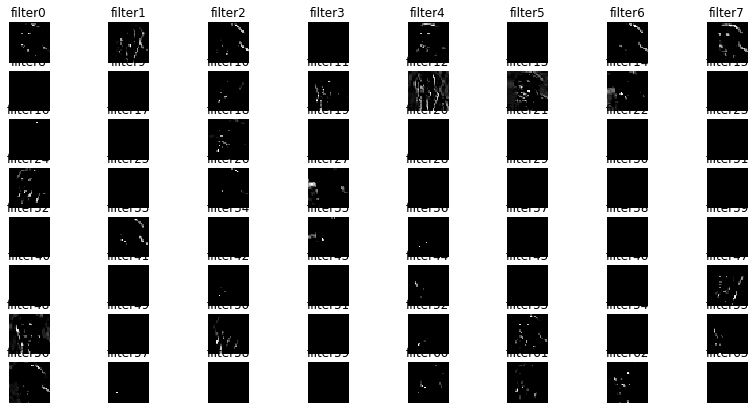

In [117]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(maxpooling_6_features[ :, :, i], cmap='gray')
plt.show()

In [118]:
'''
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(maxpooling_5_features[ :, :, i], cmap='gray')
plt.show()
'''


"\nfig=plt.figure(figsize=(14,7))\ncolumns = 8\nrows = 4\nfor i in range(columns*rows):\n    #img = mpimg.imread()\n    fig.add_subplot(rows, columns, i+1)\n    plt.axis('off')\n    plt.title('filter'+str(i))\n    plt.imshow(maxpooling_5_features[ :, :, i], cmap='gray')\nplt.show()\n"

In [119]:
testpred=classifier.predict_classes(test_set1)

In [120]:
testorg=test_set1.classes

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(testorg,testpred)

0.5035

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testorg,testpred)

array([[507, 493],
       [500, 500]], dtype=int64)